In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library('ggpubr')))
suppressWarnings(suppressMessages(library('scico')))

In [2]:
disgnet <- read.table("../../ANALYSIS/GENEMANIA/DisGeNET.txt",header=T)
disgnet <- disgnet%>%mutate(Count=as.factor(Count))%>%arrange(Count)

In [3]:
disgnet

Count,Description,logp
<fct>,<chr>,<dbl>
2,Hypoadiponectinemia,2.089262
2,Non-Hereditary_ccRCC,2.034928
3,Arteriosclerosis_Obliterans,2.904531
3,Chronic_rejection_of_renal_transplant,2.415535
3,Giant_Cell_Tumors,2.182274
4,Physical_Activity_Measurement,2.452650
4,Endometrial_adenocarcinoma,2.307745
5,Waist-Hip_Ratio,3.300196
5,Thymoma,2.575031


In [30]:
options(repr.plot.width=9, repr.plot.height=8)
p1 <- ggdotchart(disgnet, x = "Count", y = "Description",color="logp",
   rotate = FALSE, sorting = "none",dot.size = 2,                        
            ggtheme = theme_bw()+theme_cleveland())  + scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+ 
  scale_color_scico(
    palette = "berlin",midpoint=3,
    name = "logp Enrichment"
  )+
                                                                        
                                                                        theme(axis.text = element_text(size=20),axis.title=element_text(size=18),
                                                                             plot.title = element_text(size = 20),
                                                                             legend.title=element_text(size=16))+guides(color = guide_colourbar(barwidth = 0.5,
                                barheight = 20))+ggtitle("DisGeNET Enrichment")

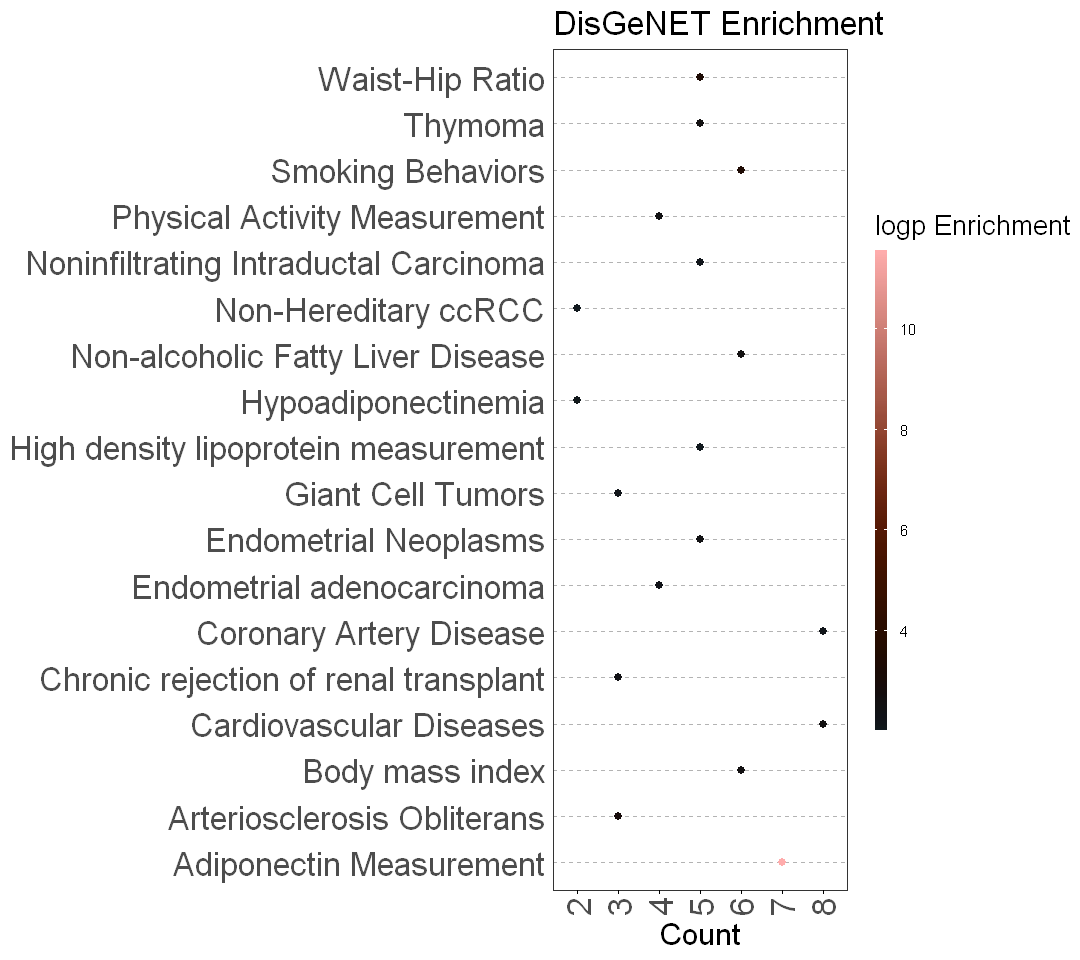

In [31]:
p1

In [32]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Fig6.jpeg", device = "jpeg",  plot = p1, width = 9, height =8 , dpi = 600, units = "in")

In [5]:
##

In [6]:
pathways <- read.table("../../ANALYSIS/GENEMANIA/pathway.txt",header=T)%>%mutate(logp=-logp)

In [7]:
pathways

GO,Category,Description,Count,logp
<chr>,<chr>,<chr>,<int>,<dbl>
GO:0045649,GO_Biological_Processes,regulation_of_macrophage_differentiation,3,5.85
WP2848,WikiPathways,Pluripotent_stem_cell_differentiation_pathway,3,4.92
WP5053,WikiPathways,Development_of_ureteric_collection_system,3,4.63
GO:0120162,GO_Biological_Processes,positive_regulation_of_cold-induced_thermogenesis,3,3.99
GO:0051052,GO_Biological_Processes,regulation_of_DNA_metabolic_process,5,3.91
GO:0045834,GO_Biological_Processes,positive_regulation_of_lipid_metabolic_process,3,3.39
hsa04022,KEGG_Pathway,cGMP-PKG_signaling_pathway,3,3.31
GO:0009410,GO_Biological_Processes,response_to_xenobiotic_stimulus,3,2.23


In [8]:
options(repr.plot.width=10, repr.plot.height=7)
p2 <- ggdotchart(pathways, x = "GO", y = "Description",color="logp",fill="Count",
   rotate = FALSE, sorting = "descending",dot.size = 2,                        
            ggtheme = theme_bw()+theme_cleveland())  + scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+ 
  scale_color_scico(
    palette = "berlin",
    name = "logp Enrichment"
  )+
                                                                        
                                                                        theme(axis.text = element_text(size=18))+guides(color = guide_colourbar(barwidth = 0.5,
                                barheight = 10))+coord_fixed()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+xlab("")+ggtitle("Pathway and Process Enrichment")

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

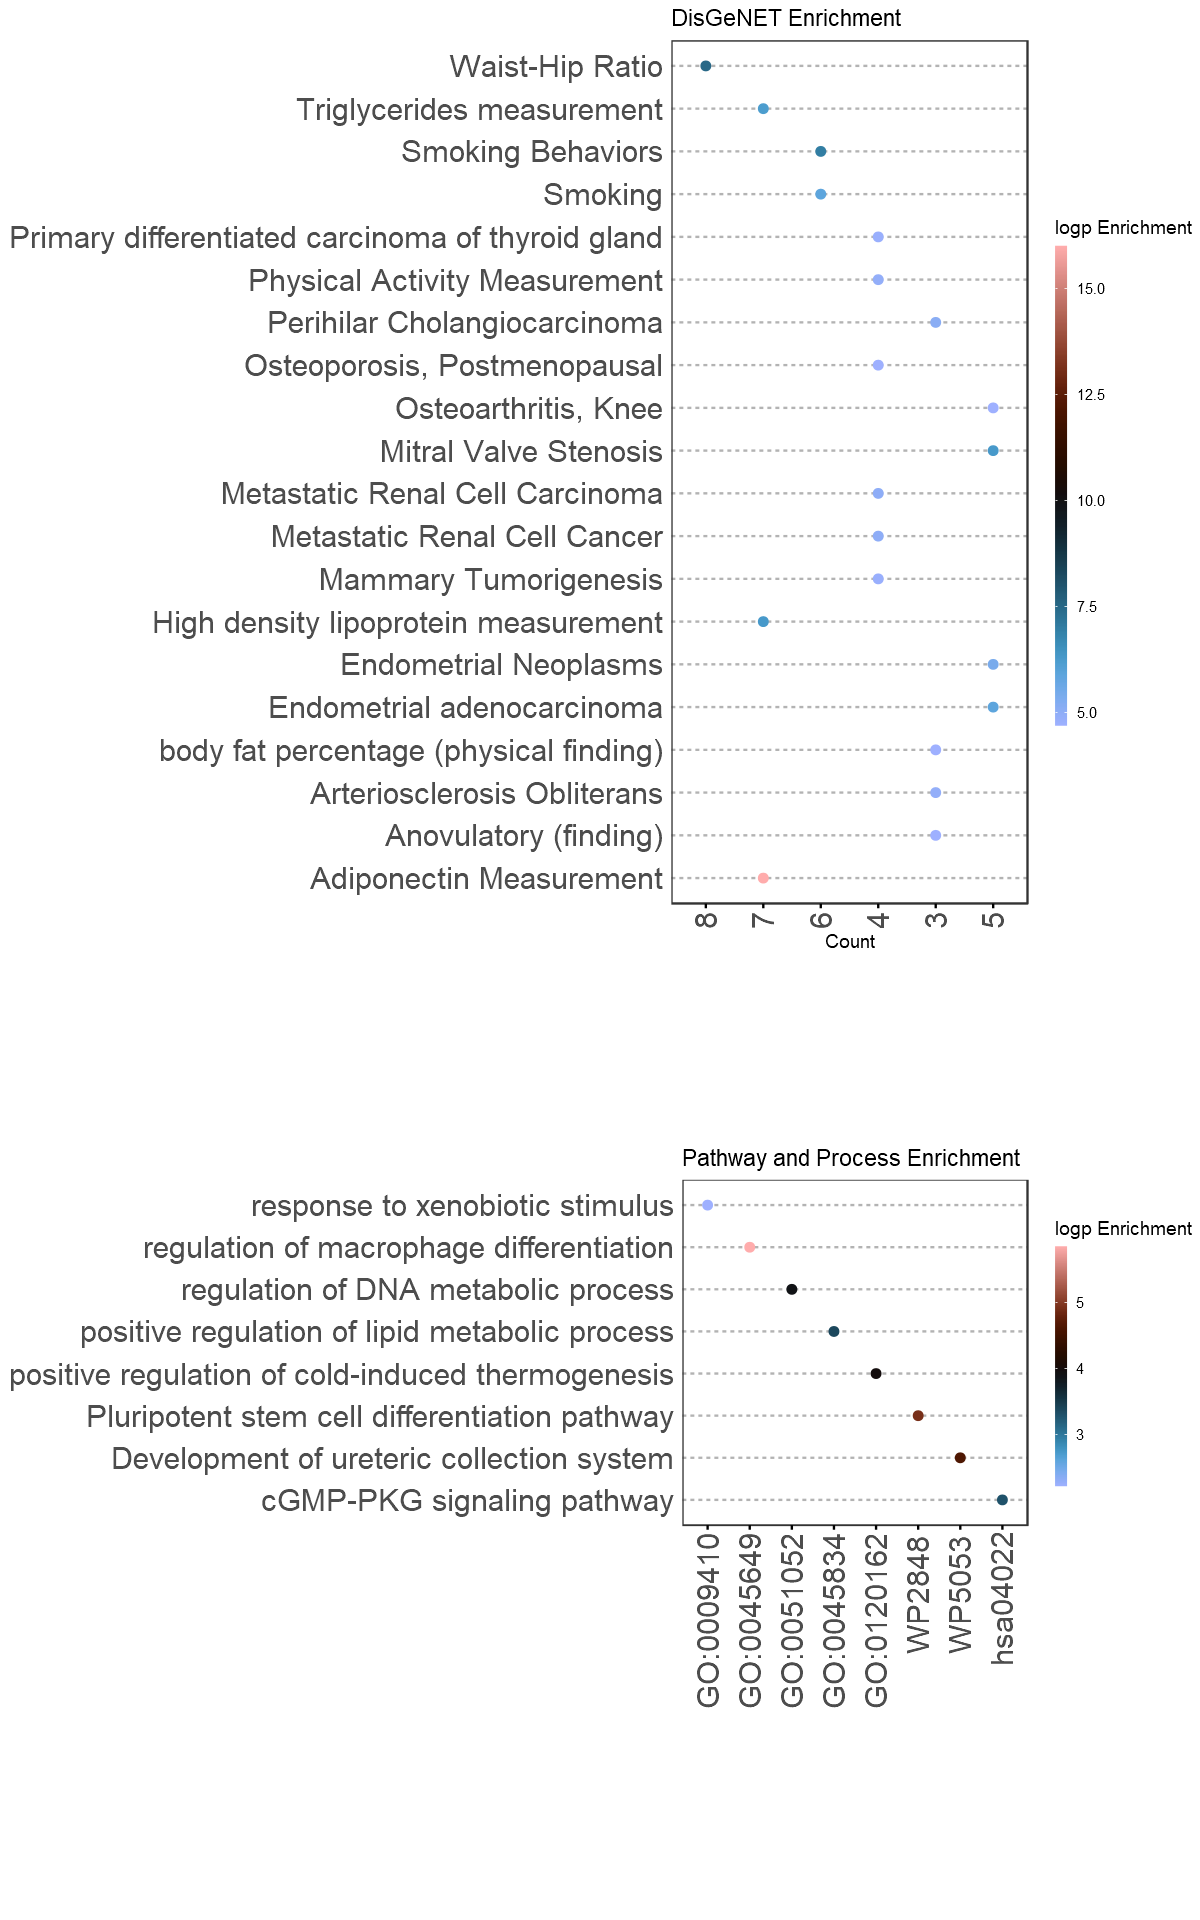

In [9]:
options(repr.plot.width=10, repr.plot.height=16)
p <- gridExtra::grid.arrange(p1,p2,ncol=1)
p
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Fig6.jpeg", device = "jpeg",  plot = p, width = 10, height =16 , dpi = 600, units = "in")